In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv("iris.csv")

In [23]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [24]:
df.shape

(150, 5)

In [25]:
df.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
df.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety          object
dtype: object

In [27]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

In [28]:
df[df.duplicated(keep='first')]

,sepal.length,sepal.width,petal.length,petal.width,variety
142,5.8,2.7,5.1,1.9,Virginica


In [29]:
print('no of records before removing duplicates', df.shape[0])

#Remove duplicates
df.drop_duplicates(keep='first', inplace=True)
print('no of records after removing duplicates', df.shape[0])

no of records before removing duplicates 150
no of records after removing duplicates 149


In [30]:
df.isnull().sum()

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64

<AxesSubplot:>

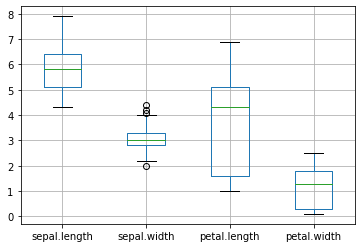

In [31]:
df.boxplot()

In [32]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [46]:
df2 = df.set_axis(["sLength", "sWidth", "pLength","pWidth","variety"], axis=1)

In [47]:
df2

,sLength,sWidth,pLength,pWidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [48]:
df2.head()

,sLength,sWidth,pLength,pWidth,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [49]:
def outlier_treatment(datacolumn):
 sorted(datacolumn)
 Q1,Q3 = np.percentile(datacolumn , [25,75])
 IQR = Q3-Q1
 lower_range = Q1 - (1.5 * IQR)
 upper_range = Q3 + (1.5 * IQR)
 return lower_range,upper_range

In [50]:
l,u=outlier_treatment(df2.sWidth)
df2[(df2.sWidth < l) | (df2.sWidth > u)]

,sLength,sWidth,pLength,pWidth,variety
15,5.7,4.4,1.5,0.4,Setosa
32,5.2,4.1,1.5,0.1,Setosa
33,5.5,4.2,1.4,0.2,Setosa
60,5.0,2.0,3.5,1.0,Versicolor


array([[<AxesSubplot:title={'center':'sLength'}>,
        <AxesSubplot:title={'center':'sWidth'}>],
       [<AxesSubplot:title={'center':'pLength'}>,
        <AxesSubplot:title={'center':'pWidth'}>]], dtype=object)

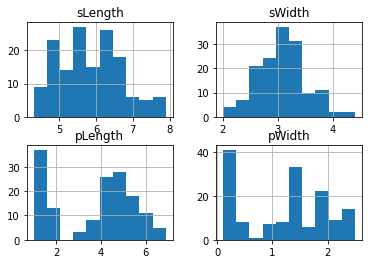

In [52]:
df2.hist()

In [53]:
#Remove outliers
df2.drop(df2[(df2.sWidth < l) | (df2.sWidth > u)].index,inplace=True)

In [55]:
df2.shape

(145, 5)